# Writing a Simple Neural Network with Numpy

(see [Learning Pytorch with examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html))

## Generate Some Data

Say we had some periodic data which we can generate like so:

In [1]:
import numpy as np
import math
import pandas as pd
import sympy


Make some 

In [2]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

To plot this first make a data frame

In [3]:
data = {'Input': x,
        'Output': y
}



df = pd.DataFrame(data, columns = ['Input', 'Output'])

print(df)

         Input        Output
0    -3.141593 -1.224647e-16
1    -3.138449 -3.143159e-03
2    -3.135306 -6.286287e-03
3    -3.132163 -9.429353e-03
4    -3.129020 -1.257233e-02
...        ...           ...
1995  3.129020  1.257233e-02
1996  3.132163  9.429353e-03
1997  3.135306  6.286287e-03
1998  3.138449  3.143159e-03
1999  3.141593  1.224647e-16

[2000 rows x 2 columns]


Now use some Boilerplate to make the plot:

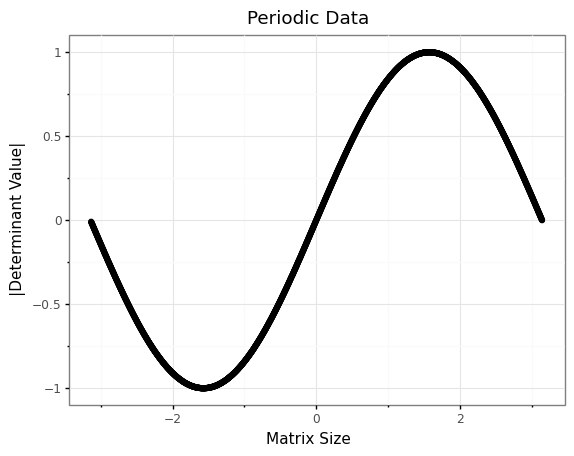

<ggplot: (8754706529476)>

In [4]:
from plotnine import *
import copy

df_plot = copy.copy(df[3:])
df_plot['Output'] = df_plot['Output'].astype(float).round(3)
df_plot

(
    ggplot(df_plot, aes(x = 'Input', y = 'Output')) +
        geom_point() +
        theme_bw() +
        labs(x = "Matrix Size", y = "|Determinant Value|") +
        ggtitle('Periodic Data')

)

## Train a Regression Model using Numpy

Let's try and fit a cubic function to this curve, we'll see how close our model can get:

$$
y = a + b \times x + c\times x^2 + d\times x^3
$$

To do this we'll have to pick some some values for $a$, $b$, $c$ and $d$ to start with:

In [5]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

Now if we measure how well the model fits by the square error we can work out all these partial derivatives:
\begin{align}
    \mathrm{RSS}                                      & = \sum^{n}_{i= 1}   \left[ \left( \hat{y}_i - y_i \right)^2 \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial \hat{y}_i} & = 2 \sum^{n}_{i= 1}   \left[ \hat{y}_i - y_i \right]  \\
 \frac{\partial \mathrm{RSS} }{\partial a}            & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial a} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial a} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( 1 \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial b}         & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial c} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial b} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( x \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) x \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial c}         & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial c} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial c} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( x^2 \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) x^2 \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial d}         & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial d} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial c} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( x^3 \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) x^3 \right]  \\
\end{align}


The gradient descent technique adjusts the weights by using these gradients in order to try and find a mimimum value like so:


\begin{align}
    w_i \leftarrow w_i - \eta \frac{\partial w_i }{\partial \mathrm{RSS}} \quad \exists \eta \in \mathbb{R}
\end{align}


This can be implemented using a loop:

1. Calculate $\hat{y}$
2. Calculate $\mathrm{RSS}$
3. Calculate $\frac{\partial \mathrm{RSS}}{\partial w}$
4. Adjust $w$ using the weights


In [6]:
learning_rate = 1e-6
eta = learning_rate     # because It's shorter

epoch = len(x)
for t in range(10*epoch):
    # 1. Find yhat (forward pass in NN)
    y_pred = a + b*x +c*x**2 + d*x**3

    # 2. Measure the Loss
    loss = np.square(y_pred-y).sum()
    ## Print it on ocassion
    if t % 900 == 0:
        print(t, '\t', loss)

    # 3. Calculate the Gradients (Back Propagation)
    grad_y_pred = 2.0 * (y_pred-y)
    grad_a = (grad_y_pred*x**0).sum()
    grad_b = (grad_y_pred*x**1).sum()
    grad_c = (grad_y_pred*x**2).sum()
    grad_d = (grad_y_pred*x**3).sum()

    # 4. Update the Weights
    a = a - eta*grad_a
    b = b - eta*grad_b
    c = c - eta*grad_c
    d = d - eta*grad_d

    
print("\nFinished\n---\n")
print(f'Output: y = {a.round(1)} + {b.round(1)}x + {c.round(1)}x^2 + {d.round(1)}x^3')



0 	 110382.67344287244
900 	 183.84715764174368
1800 	 14.245469806379802
2700 	 9.001672649538934
3600 	 8.823997151618507
4500 	 8.817436102829118
5400 	 8.817176650824909
6300 	 8.817165890781352
7200 	 8.817165430932256
8100 	 8.817165410926886
9000 	 8.817165410047688
9900 	 8.817165410008828
10800 	 8.817165410007103
11700 	 8.817165410007028
12600 	 8.817165410007025
13500 	 8.817165410007027
14400 	 8.817165410007025
15300 	 8.817165410007027
16200 	 8.817165410007027
17100 	 8.817165410007025
18000 	 8.817165410007027
18900 	 8.817165410007027
19800 	 8.817165410007025

Finished
---

Output: y = 0.0 + 0.9x + -0.0x^2 + -0.1x^3


As can be seen, the best the model can do is to fit with an RSS of 8.817, let's plot the model:

In [7]:
# create the Column
df['Prediction'] = a + b*x + c*x**2 + d*x**3

In [8]:
print(df.head(3))

      Input        Output  Prediction
0 -3.141593 -1.224647e-16    0.202297
1 -3.138449 -3.143159e-03    0.196313
2 -3.135306 -6.286287e-03    0.190346


In [9]:
# Pivot the Data Frame to be longer
df_melt = pd.melt(df, id_vars = ['Input'], value_vars = ['Output', 'Prediction'], var_name = "Output_Type", value_name = "Output_Value")
print(df_melt.head(3))


      Input Output_Type  Output_Value
0 -3.141593      Output -1.224647e-16
1 -3.138449      Output -3.143159e-03
2 -3.135306      Output -6.286287e-03


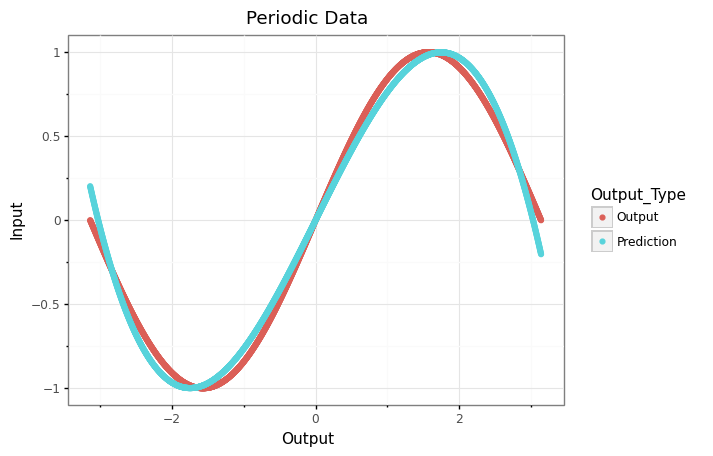

<ggplot: (8754697937047)>

In [10]:
# Make the Plot
(
    ggplot(df_melt, aes(x = 'Input', y = 'Output_Value', color = 'Output_Type')) +
        geom_point() +
        theme_bw() +
        labs(x = "Output", y = "Input") +
        ggtitle('Periodic Data')

)

As can be seen this got pretty close, the cubic curve is fundamentally different from a sine wave however.

## Train Regression using Torch Tensors

PyTorch has `tensors` which are just like `numpy` arrays and so the same thing could be done using Torch like so:

In [11]:
import torch
import math

# Set the Defaults
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # This would turn on Cuda Cores

# Build the data
x = torch.linspace(-math.pi, math.pi, 2000, device = device, dtype = dtype, requires_grad=False)
y = torch.sin(x)

# Create the Random Weights
a = torch.randn((), device = device, dtype = dtype)
b = torch.randn((), device = device, dtype = dtype)
c = torch.randn((), device = device, dtype = dtype)
d = torch.randn((), device = device, dtype = dtype)

eta = 1e-6
print('t', '\t', 'Loss')
print('----------------')
# Begin the Loop
for t in range(3000):

    # 1. Predict the Model Output (Forward Pass)
    y_pred = a + b*x + c*x**2 + d*x**3 

    # 2. Measure the Loss of the Model
    loss = (y_pred-y).pow(2).sum().item()
    ## Print the loss
    if t % 200 == 0 :
        print(t, '\t', round(loss, 2))

    # 3. Calculate the Gradients with respect to Loss (Back Propagation)
    grad_y_pred = 2*(y_pred-y)
    grad_a_pred = (grad_y_pred * 1).sum()
    grad_b_pred = (grad_y_pred * x).sum()
    grad_c_pred = (grad_y_pred * x**2).sum()
    grad_d_pred = (grad_y_pred * x**3).sum()

    # 4. Update the weights
    a = a - eta * grad_a_pred
    b = b - eta * grad_b_pred
    c = c - eta * grad_c_pred
    d = d - eta * grad_d_pred

print('---\n\nFinished!\n\n---')
print(f'y = {round(a.item(),2 )} + {round(b.item(), 2)}*x + {round(c.item(), 2)}*x^2 + {round(d.item(), 2)}*x^3')


t 	 Loss
----------------
0 	 423021.66
200 	 1184.71
400 	 577.62
600 	 284.89
800 	 143.23
1000 	 74.45
1200 	 40.95
1400 	 24.59
1600 	 16.57
1800 	 12.64
2000 	 10.71
2200 	 9.75
2400 	 9.28
2600 	 9.05
2800 	 8.93
---

Finished!

---
y = 0.01 + 0.86*x + -0.0*x^2 + -0.09*x^3


## Using Autograd to implement Automatic Differentiation

The real point of using Torch however is that the gradients can be automatically calculated via *Automatic Differentiation*, this makes it much easier to work with gradients for complex deeply nested functions (i.e. Neural Networks).

So first import the packages, set the devices and  create some data:

In [12]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

In [13]:
# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)


Now we can create some random weights, this time ensuring that the gradients are calculated:

In [14]:

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

Next we just use a loop to continuously adjust the weights:

1. **Forward Pass**; Calculate the y prediction
2. Measure the Loss
3. **Back Propagation**; Calculate the gradients $\frac{\partial w_i}{\partial \mathrm{E}}$
  * This differs here, rather than working out the derivatives ourselves, we can just call loss.backward() and all the derivative values will be stored in the `.grad` attributes.
  * After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    the gradient of the loss with respect to a, b, c, d respectively.
    
4. Update the weights
  * Just like before, but this time we can just use the `.grad` attribute
  * This needs to be wrapped in a `with torch.nograd()` so that the weights of `a` aren't recalculated with respect to the adjustment, we would instead re-calculate the gradients on the next iteration of the loop at loss.backward
  * The gradients should be reset to zero so that the attribute is free on the next iteration (and to avoid old gradients being used in the event of an error)
 

In [15]:

print('iterations', '\t', 'loss')
print('----------------\n')
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, '\t', loss.item())
       

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


iterations 	 loss
----------------

99 	 80.67417907714844
199 	 56.93980026245117
299 	 41.0687370300293
399 	 30.448091506958008
499 	 23.33618927001953
599 	 18.570436477661133
699 	 15.37441635131836
799 	 13.229562759399414
899 	 11.788920402526855
999 	 10.820484161376953
1099 	 10.168935775756836
1199 	 9.730189323425293
1299 	 9.434455871582031
1399 	 9.234945297241211
1499 	 9.100218772888184
1599 	 9.00914192199707
1699 	 8.947509765625
1799 	 8.90576171875
1899 	 8.87745475769043
1999 	 8.858235359191895
Result: y = -0.0045369286090135574 + 0.8521096110343933 x + 0.0007826936198398471 x^2 + -0.09267163276672363 x^3


## Defining Functions in Torch

Torch uses the chain rule and Automatic Differentiation, this isnt an issue if the function, say $y = a + bx + cx^2 + dx^3$, can be conveniently constructed using `torch` *methods*, if not it may be more convenient to create a function and outright specify what the forward/backward pass should give:

  * *forward* pass
    * (i.e. the output of the function)
  * *backward* pass
    * (i.e. the gradient of the output, with respect to the input):
    
    \begin{alignat}{2}
                                      f(x) &= \mathtt{forward}\left(x\right)  &= 4x^3 \\
    \implies \frac{\partial f}{\partial x} &= \mathtt{backward}\left(x\right) &= 12x^2
    \end{alignat}


So let's say, for example that my modelling problem was a little tricker, I wanted to model the area under the normal distribution using a sigmoid function, for whatever reason :shrug:, It may be better to write a sigmoid function so that the code is more modular.

To do this we simply need to define a subclass of `torch.autograd.Function` as described in [this example](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

It isn't however immediately clear how to specify a function with multiple variables (e.g. $x$ and $\sigma$ in the case of $y=\frac{1}{1+e^{-x\sigma}})$ and how to work with the multiple gradients.

First We'll create the data:

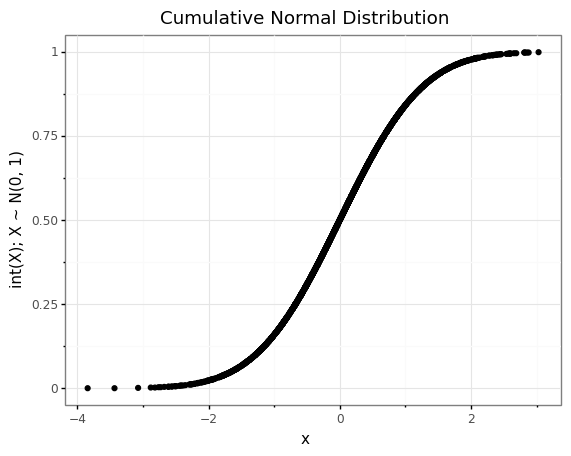

In [16]:
# * First load the packages
import torch
import math

dtype = float
device = torch.device('cpu')

# * Now build some data
import numpy
import scipy.stats

x = torch.randn(2000, device = device, dtype = dtype, requires_grad=False)
y = 0.5*(torch.exp(x) - torch.exp(-x))
y = scipy.stats.norm.cdf(x)
y = torch.from_numpy(y)

# ** Plot the Data
from plotnine import *
import pandas as pd

data = {'Input': x,
        'Output': y
        }

df = pd.DataFrame(data, columns = ['Input', 'Output'])

import copy

df_plot = copy.copy(df[3:])
df_plot['Output'] = df_plot['Output'].astype(float).round(3)
df_plot

p = (
    ggplot(df_plot, aes(x = 'Input', y = 'Output')) +
        geom_point() +
        theme_bw() +
        labs(x = "x", y = "int(X); X ~ N(0, 1)") +
        ggtitle('Cumulative Normal Distribution')

)

fig = p.draw()
fig.show()


Now that the data has been created a function for a sigmoid curve can be defined like so:

In [17]:

class sigmoid(torch.autograd.Function):
    """
    The Sigmoid Curve, this will calculate the output and contain the partial derivative
    """
    @staticmethod
    def forward(ctx, input):
        """
        The forward pass receives an input tensor and outputs the
        value of the sigmoid function applied to each element.

        ctx is a context object that can be used to cache arbitrary objects for
        use in the backward pass (e.g. maybe to save a variable like sqrt() which is
        computationally expensive and could be used in the backward pass)

        additional parameters can also be defined, but, input must be last.
        """
        ctx.save_for_backward(input)
        return 1/(1+torch.exp(-input))

    @staticmethod
    def backward(ctx, grad_output):
        """
        The backward pass returns the partial derivative of the function with
        respect to the Error.

        To do this calculate ∂f/∂x then return:

            grad_output*∂f/∂x

        because grad_output will be equal to ∂E/∂f the chain rule will cancel it out.

        but each input must have a gradient returned.
        """
        input, = ctx.saved_tensors                             # The comma unpacks the list item
        grad_input = torch.exp(-input)/((1+torch.exp(-input)).pow(2))

        return grad_input



- ***forward***:
  - Forward has two parameters, `ctx` and `input`
    - `ctx` is a context attribute used to store values so that they can be passed to the `backward` function
    - `input` contains the values that are being given to the function, so like $\vec{\mathbf{X}}$
  - The `input` needs to be saved to `ctx` by using the `ctx.save_for_backward` method, this way it can be extracted in the `backward` method later on
  - The forward function should return the desired output of the function
    - Calling `sigmoid.forward()` will not be possible because there is no access to the `ctx` object, instead however the `sigmoid.apply()` method can be used to get the output of the function, it will take every argument except the `ctx` argument
- ***backward***:
  - Backward has two parameters, `ctx` and `grad_output`
    - The `ctx` attribute is passed between `forward` and `backward` as a storage object
    - The `grad_output` object is the output gradient from the preceeding layer, i.e. $\frac{\partial \mathrm{L}_\mathrm{oss}}{\partial f}$, we can multiply with this, via the chain rule to get the grad_input
      - `grad_input` means the *rate of change of the Error with respect to the input* ($\frac{\partial \mathrm{L}_\mathrm{oss}}{\partial \mathtt{input}}$) and `grad_output` has an equitable meaning ($\frac{\partial \mathrm{L}_\mathrm{oss}}{\partial \mathtt{output}}$).
    - The Backward method should return the gradient of the Error with respect to the `input` (`grad_input` = $\frac{\partial  }{\partial \mathtt{input}} \left( \mathtt{forward.apply(input)} \right)$) for the `forward` method, this can be acheived by using the chain rule like so:
    
      \begin{align}
      \frac{\partial \mathrm{L}_\mathrm{oss} }{\partial \mathtt{input} } &= \frac{\partial \mathrm{L}_{\mathrm{oss}} }{\partial \mathtt{forward}} \times \frac{\partial \mathtt{forward} }{\partial \mathtt{input}} \\
       &= \mathtt{grad\_output} \times \frac{\partial \mathtt{forward} }{\partial \mathtt{input}} \\
       &= \mathtt{grad\_output} \times \mathtt{grad\_input}
      \end{align}

      


However this function is not terribly useful, because, it does not have any parameters, instead we want something like:

\begin{align}
    y&= \frac{1}{1+ e^{- \sigma x}}
\end{align}

In order to implement that, we need to add a variable to the methods like so:

In [18]:
# * Define the function we are going to use
# we want to use yhat = 1/(1+e^-x)
class sigmoid(torch.autograd.Function):
    """
    The Sigmoid Curve, this will calculate the output and contain the partial derivative
    """
    @staticmethod
    def forward(ctx, sigma, input):
        """
        The forward pass receives an input tensor and outputs the
        value of the sigmoid function applied to each element.

        ctx is a context object that can be used to cache arbitrary objects for
        use in the backward pass (e.g. maybe to save a variable like sqrt() which is
        computationally expensive and could be used in the backward pass)

        additional parameters can also be defined, but, input must be last.
        """
        ctx.save_for_backward(input, sigma)
        return 1/(1+torch.exp(-input*sigma))

    @staticmethod
    def backward(ctx, grad_output):
        """
        The backward pass returns the partial derivative of the function with
        respect to the Error.

        To do this calculate ∂f/∂x then return:

            grad_output*∂f/∂x

        because grad_output will be equal to ∂E/∂f the chain rule will cancel it out.

        but each input must have a gradient returned.
        """
        input, sigma = ctx.saved_tensors                             # The comma unpacks the list item
        grad_sigma = x*torch.exp(-sigma*x)/((1+torch.exp(-sigma*x)).pow(2))
        grad_input = torch.exp(-input)/((1+torch.exp(-input)).pow(2))

        #
        return grad_sigma, grad_input




Observe that the order of `sigma`, `input` and `grad_sigma`, `grad_input` are consistent. The `grad_sigma` value is the derivative of the `forward.apply(input)` method with respect to sigma. An easy way to get the derivative is to use sympy like so:

```python
from __future__ import division
from sympy import *
input, sigma, x, y, z, t = symbols('input sigma x y z t')
k, m, n = symbols('k m n', integer=True)
sigmoid, f, g, h = symbols('sigmoid f g h', cls=Function)
init_printing()
init_printing(use_latex='mathjax', latex_mode='equation')


import pyperclip
def lx(expr):
    pyperclip.copy(latex(expr))
    print(expr)

import numpy as np
import matplotlib as plt

def sigmoid(x, sigma):
    return 1/(1+exp(-x*sigma))

diff(sigmoid(x, sigma), sigma)
```

Now the Neural network can be trained with a for loop:

In [20]:
sigma = torch.randn((), device=device, dtype=dtype, requires_grad=True)
eta   = 1e-6

# ** Begin the Loop
print('iterations', '\t', 'loss')
print('----------------\n')
for t in range(5000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = 1/(1+torch.exp(-x*sigma))

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 1000 == 0:
        print(t, '\t', loss.item())


    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        sigma -= eta * sigma.grad

        # Manually zero the gradients after updating weights
        sigma.grad = None

print('\n')
print(f'Result: y = 1/(1+torch.exp(-x * {round(sigma.item())}))')


iterations 	 loss
----------------

0 	 20.17979474354855
1000 	 16.338686598368536
2000 	 13.435130218738887
3000 	 11.188557901899326
4000 	 9.416653346705797


Result: y = 1/(1+torch.exp(-x * 1))


and the results plotted:

      Input Output_Type  Output_Value
0  1.797330      Output      0.963858
1  1.557464      Output      0.940320
2 -1.359124      Output      0.087054


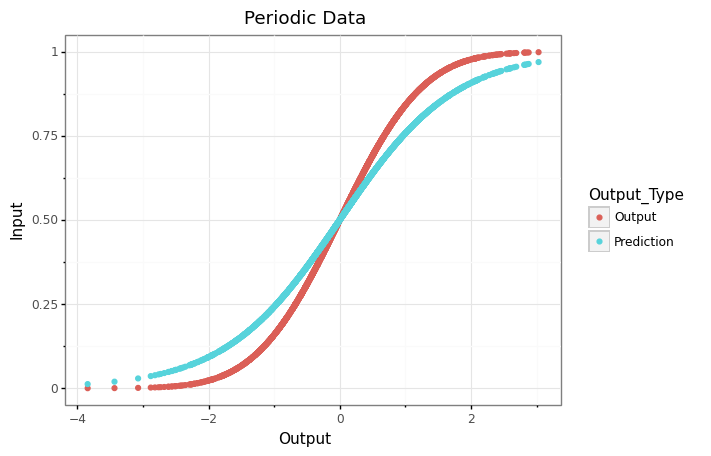

In [21]:

# ** Plot the fitted Model
# create the Column
#
df['Prediction'] = y_pred.detach().numpy()
# Pivot the Data Frame to be longer
df_melt = pd.melt(df, id_vars = ['Input'], value_vars = ['Output', 'Prediction'], var_name = "Output_Type", value_name = "Output_Value")
print(df_melt.head(3))
# Make the Plot
p2 = (
    ggplot(df_melt, aes(x = 'Input', y = 'Output_Value', color = 'Output_Type')) +
        geom_point() +
        theme_bw() +
        labs(x = "Output", y = "Input") +
        ggtitle('Periodic Data')

)

fig2 = p2.draw()
fig2.show()


## Modules

Defining Functions like this can also get very confusing, particularly when defining many nested functions, as would be done in a Neural Network, To overcome this the `nn.modules` can be used, these are an abstraction that use 'layers' to make it easier to build networks.

To demonstrate this a neural netwrok will fit to model the sine wave using a Neural network, the Neural network will be a 1-3-1 model, where the first layer seperates $\vec{x}$ into $\begin{bmatrix} \vec{x} & \vec{x}^2 & \vec{x}^3 \end{bmatrix}^\mathrm{T}$

## Build the Data

In [1]:
import torch
import math

# Generate Some Data
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

Build the First Layer by seperating $\vec{x}$ into $\begin{bmatrix} \vec{x} & \vec{x}^2 & \vec{x}^3 \end{bmatrix}^\mathrm{T}$:

In [7]:
p = torch.tensor([1, 2, 3])
X = x.unsqueeze(-1).pow(p)
print(f'X is a matrix of size {X.shape}:\n\n{X}')

X is a matrix of size torch.Size([2000, 3]):

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])


### Define the Model

- `torch.nn.Sequential` module contains other Modules and applies them in sequence to produce an output.
- `torch.nn.Linear` Uses a Linear function to compute output, so for example `output = W*input`
- `torch.nn.Flatten` Reduces the Dimension of a Tensor, observe the following Example:


In [27]:
import torch
input = torch.randn(4, 3)
print('Input is \n\n', input, '\n')
m = torch.nn.Sequential(
    #torch.nn.Conv2d(1, 32, 5, 1, 1)
    torch.nn.Flatten(start_dim=0, end_dim=1)
)
output = m(input)
print(f'Output is of size {output.size()} and is:\n\n', output)


Input is 

 tensor([[ 1.5015,  0.0630,  0.5483],
        [ 0.3924,  0.9929, -0.0814],
        [ 1.8088, -0.1302,  1.0924],
        [-0.0773, -0.9642, -0.4579]]) 

Output is of size torch.Size([12]) and is:

 tensor([ 1.5015,  0.0630,  0.5483,  0.3924,  0.9929, -0.0814,  1.8088, -0.1302,
         1.0924, -0.0773, -0.9642, -0.4579])
